# Start simple, start with a baseline !

- toc: true

## Motivation
Don't start with something fancy, complicated as your first solution.  
Always start with a baseline (simple solution). Why ? You might ask, well there's two reasons for that :
- So you have something to compare to.
- Because complicated does not imply effective (your simple solution might be better then the fancy one).  

> If you are using colab, make sure to change your runtime to GPU.

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook

     |████████████████████████████████| 727kB 11.1MB/s 
     |████████████████████████████████| 1.1MB 47.6MB/s 
     |████████████████████████████████| 194kB 52.2MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 51kB 9.7MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
     |████████████████████████████████| 40kB 7.7MB/s 
     |████████████████████████████████| 51kB 9.9MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 2.6MB 57.1MB/s 


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## What will we do ?
We will to implement a simple approach to handwritten digit classification **without Deep Learning**. We'll see that it is pretty accurate, and we'll learn some fastai, pytorch, computer vision basics along the way. 

## How will we do it ? 

We will use a dataset called **MNIST**, which is a pretty popular dataset containing images of handwritten digits but we'll use a sample of it containing only the digits 3 and 7 (which is provided by fastai).  

Our approach consists of two steps:

- Obtain the image of perfect 3 and 7.
- Compare every picture we have to these perfect 3 and 7, and to whom ever it is closest, we'll attribute it the corresponding label.

## Let's do it !

### 1. Create our perfect 3 and 7

Okay, before we start let's download our dataset. For that we will use the fastai method *untar_data*, which given an *url*, downloads the dataset (if not already downloaded), and extracts it (if not already exctracted).  
We position our selves in the dataset folder by setting the *BASE_PATH*, to the path returned by the method. 

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

Inside that folder we can see two other folders *valid* and *train*, that contain the validation and training set respectively. You'll see this pretty frequently when you download publically availble datasets (they will be already be split into a *valid* and *training* sets for you).

In [4]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

Now inside the train folder, we have also two other folders 3 and 7 that as you probably guess it contain the respective images of the digits (This is also pretty common in public datasets, the different images will be put in folders named with the corresponding label).

In [5]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

We get the paths of the different images (sorted), to open them for later. If you notice, there is *(#6131)* before the list, this is because it's not an actual list but rather a fastai object called L, which is a list but with some additional features (another feature is that it displays only the first ten elements of the list). 

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

Let's open one image for each label, to ensure that they are actuall images of 3 and 7.

In [7]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [8]:
im7_path = sevens[4]
im7 = Image.open(im7_path)
im7


#### Images are numbers ?

Before we go any further, i need to tell you that an image for a computer is just a bunch of numbers.  

To be more precise, it is a composed of pixels. To simplify things (and this is the case for our dataset), we'll take an example of gray scale images (images containing only black, white, and shades of grey in between).
Every pixel makes a tiny bit of the image where the pixel takes a value (between 0 and 255) and that value tells to the computer how to display that particular pixel. Aseembled together they form the image.  

Okay, let's turn our image into a *Numpy* array (which is just an array but wth **super powers**, and *Numpy* is just the most used python module for *Numerical computing*).

The thing between brackets is called **slicing**, and it's telling *Numpy* that we want to display the fourth row/column up to but not including the thenth one.

As we can see, an image is just a bunch of numbers.

In [9]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

We'll do the same thing, but instead of an array, we'll turn our image into a *PyTorch* **tensor**, which behaves much like a *Numpy* array but has the benefit to do our *operations* in the **GPU** (it's a lot, i mean a lot **faster**).

And the *dtype* in the end is the type of data in the tensor/array, which in this case is an unsigned 8 bit integer (0 to 255).

In [10]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

To better visualize how a computer display an image, we'll turn our tensor containing the pixel values of our image into a *DataFrame* (it's an object provided by the **Pandas** module. For now, you just need to know that it's a table of values). With each value (pixel) in the table displayed with the corresponding color (0 for white, 255 for black, values in between for shades of grey).

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


Let's open all our images, turn them into tensors and put them in the corresponding list. To speed things up, we'll use a list comprehension (for more details a quick Google search will do it).

Let's ensure that we have all our images ready by checking the length of the two lists.

In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

So far we have seen how to turn our images into tensors/arrays (a bunch of numbers), but how do we do the reverse operation ?

Well it is pretty simple, thanks to fastai *show_image* method, we can do just that.

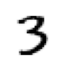

In [13]:
show_image(three_tensors[1]);

Remember we have to find the perfect 3 and 7, one way of doing it (our approach) is to find the mean of every pixel of all the 3/7 images of our dataset.

To do that we'll **stack** our second order tensors (second order means that it's a two dimensionnal object or matrix, more generally we say that we have a **k-th order tensor**) to form a third order tensor (three dimesionnal object).
And cast it to float (turn our integers in the tensor into float, in other words change the type of the data in our tensor).

We also divide by 255 because when images are represented by floats, we generally expect the values to be between 0 and 255.

To ensure that we've done this right we print the **shape** of the tensor (which is the number of elements in each axis/dimension) and we check that we have indeed 6131 images of 28x28.

> Note that nothing about this tensor tells us explicitly that the first axis is the number of images and so on. This is because it is entirely up to us and how we construct the it. For the tensor it is just a bunch of numbers in memory. 

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

We can also check that we did not screw something, by checking the number of dimensions/axis of the tensor (which in this case is three).
> The number of dimmesions/axis of the tensor is also the length of the shape.

In [15]:
stacked_threes.ndim

3

Okay, now we have everything we need, to calculate our perfect 3/7 we'll use the *mean* method provided by *PyTorch* and we give it as an argument the index along which we want to calculate the mean, in our case it'll be the first axis (0-indexed) because we want the mean of every pixel across all images.

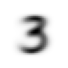

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

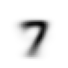

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

> As you can notice, the parts where images "agree" (similar pixel values) that this is how a handwritten 3/7 is supposed to look like are darker then the parts where they disagree-- kinda of blurry (due to different pixel values). 

### 2. Measure the distance (similarity)

Our final step will consist of calculating the distance of a given image and our perfect 3/7 and we'll say that it is a 3/7 if it is closest to the perfect 3/7 respectively.

Okay, but what's the distance between two images. For that purpose we can use either :

- **L1 norm**: which is the mean absolute difference, in other words, we take the absolute value of the difference between each pixel of the two images and average over all pixels. 

- **L2 norm**: root mean squared error, same as above but instead of taking the absolute value, we square the differences, then average and finally take the square root (which will "undo" the squaring). 

In [18]:
a_3 = stacked_threes[1]
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [19]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

Taking a random 3, we see that the distance from the perfect 3 is less then the distance from the perfect 7, which is exactly what we wanted. Our solution looks promising !

> *PyTorch* provides methods to calculate **L1 norm & MSE** (**MSE** is the just L2 norm whitout the square root), they are inside the *torch.nn.functional*, which is already imported by fastai as **F**.

> L1 & L2 norm are **loss functions**. 

In [20]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

> The **MSE** penalyzes mistakes more heavily then **L1 norm** (on the other hand it is more merciful towards small mistakes).

To test how good our model is, we'll need a validation set (images he has not seen before), recall that in our dataset folder this is already provided by **MNIST** in the valid folder. So we'll just do the same operations we did for the training set seen above to create our *tensors*.

> It's good practise to check your tensor's shape to ensure that you've done everything properly.

In [21]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

Let's create a function that does what we've discussed earlier (calculate distances), the *(-1, -2)* means that we calculate the mean along the last axis and the second last axis (which represents the width and the height of the image).

In [22]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

Cool this was for one image tho but how about all the validation set (because this is what we need to calulate the *metric*). Well i'am glad you ask, this shows that you are paying attention (or just that i'am talking to myself ...). 

Well thanks to *PyTorch* we don't have to re-write *mnist_distance* function because it uses a neat trick called **Broadcasting**. It means that rather then complaining about the shapes being different, when given a rank 3 tensor (validation set images) and rank 2 tensor (ideal 3), it treats the rank 2 tensor as if it was a rank 3 one (you can imagine in your head that it kinda of duplicates the ideal 3 1010 times and it substracts it from each image from the validation set element wise, but it does not actually duplicate it-- no more memory is allocated).

Finally it takes the mean over the last and second last axis, which is the height and width of each image, which leaves us with rank 1 tensor (array), of the distance of each image in the validation set from the ideal 3. 

In [23]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1133, 0.1656, 0.1848,  ..., 0.1623, 0.1447, 0.1252]),
 torch.Size([1010]))

Now all is left to do is create a function that tells us whether an image is a 3 or a 7. By comparing the distance between the ideal 3/7 respectively (True for 3, False for 7).

> This function will automaticlly do **Broadcasting** and be applied **element wise**, just like all *PyTorch* functions and operators.

In [25]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [27]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ...,  True, False,  True])

> If we convert a boolean tensor into float we get a 1. for True and 0. for False (this will come in handy to calculate the accuracy).

In [26]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

Let's see how good our simple solution is. It has **95%** overall accuracy which is more then acceptable ! 

In [28]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))